 -=-    trial upload 1
PROJECT GITHUB

Understanding Moving Averages




help traders determine what is happening in the market by smoothing out price data and filtering out short-term volatility

Many traders also use moving averages as the basis of a trend-following trading system



Backtesting class - 

**** CREDITS

This script is inspired by code originally published by russs123.
 * Original work is licensed under the MIT License.
 * Copyright (c) 2024 russs123
 * 
 * See the full license at: https://github.com/russs123/moving_average/blob/main/LICENSE

In [3]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/294.9 kB 777.7 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#import libraries
import yfinance as yf  
import numpy as np  
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns  # Statistical data visualization, built on matplotlib

In [9]:
#define variables
FAST_MA = 50  # Fast moving average period, typically short-term trends
SLOW_MA = 200  # Slow moving average period, typically long-term trends
STARTING_BALANCE = 10000  # Initial capital for trading simulation

#define time period
# The time range for backtesting the strategy
START = datetime.datetime(2005, 1, 1)  # Starting point of the data
END = datetime.datetime(2020, 1, 1)  # Ending point of the data
YEARS = (END - START).days / 365.25  # Total years for the backtest, accounting for leap years

#load data into a pandas dataframe
# Define the financial instrument (S&P 500 index)
symbol = "^GSPC"

# Download historical price data for the defined symbol and time period
price = yf.download(symbol, start=START, end=END)

# Display the first few rows of the data to understand its structure
price.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6020\3395431245.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price = yf.download(symbol, start=START, end=END)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2005-01-03,1202.079956,1217.800049,1200.319946,1211.920044,1510800000
2005-01-04,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1192.199951,1182.160034,1187.890015,1477900000


In [10]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume'], axis=1)

price.head()

Price,Close,Open
Ticker,^GSPC,^GSPC
Date,,
2005-01-03,1202.079956,1211.920044
2005-01-04,1188.050049,1202.079956
2005-01-05,1183.739990,1188.050049
2005-01-06,1187.890015,1183.739990
2005-01-07,1186.189941,1187.890015


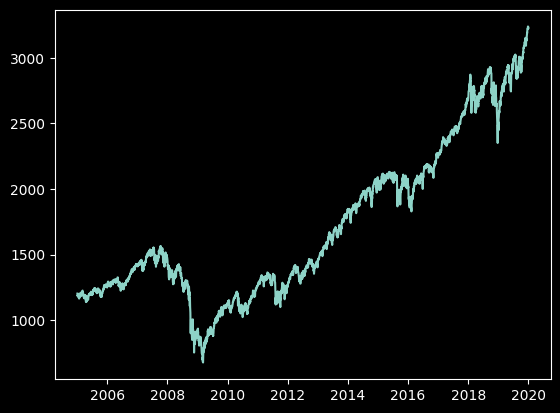

In [11]:
#plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [12]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal
Ticker,^GSPC,^GSPC,,
Date,,,,
2019-12-24,3223.379883,3225.449951,0.999805,26815.020636
2019-12-26,3239.909912,3227.199951,1.005128,26952.532532
2019-12-27,3240.020020,3247.229980,1.000034,26953.448506
2019-12-30,3221.290039,3240.090088,0.994219,26797.635406
2019-12-31,3230.780029,3215.179932,1.002946,26876.581820


In [13]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Ticker,^GSPC,^GSPC,,,,,,
Date,,,,,,,,
2019-12-24,3223.379883,3225.449951,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890
2019-12-26,3239.909912,3227.199951,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840
2019-12-27,3240.020020,3247.229980,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541
2019-12-30,3221.290039,3240.090088,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591
2019-12-31,3230.780029,3215.179932,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791


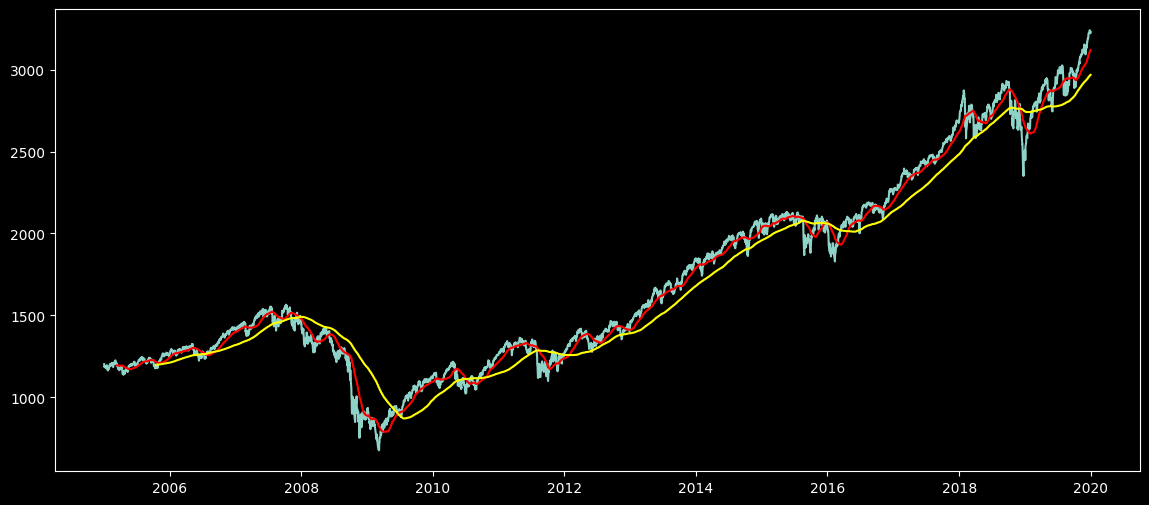

In [14]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")

plt.show()

In [15]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Ticker,^GSPC,^GSPC,,,,,,,
Date,,,,,,,,,
2019-12-24,3223.379883,3225.449951,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True
2019-12-26,3239.909912,3227.199951,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True
2019-12-27,3240.020020,3247.229980,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True
2019-12-30,3221.290039,3240.090088,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True
2019-12-31,3230.780029,3215.179932,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True


In [16]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Ticker,^GSPC,^GSPC,,,,,,,,
Date,,,,,,,,,,
2019-12-24,3223.379883,3225.449951,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True,0.999805
2019-12-26,3239.909912,3227.199951,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True,1.005128
2019-12-27,3240.020020,3247.229980,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True,1.000034
2019-12-30,3221.290039,3240.090088,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True,0.994219
2019-12-31,3230.780029,3215.179932,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True,1.002946


In [17]:
#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Ticker,^GSPC,^GSPC,,,,,,,,,
Date,,,,,,,,,,,
2019-12-24,3223.379883,3225.449951,0.999805,26815.020636,26820.262608,-5.241972,3100.961187,2959.558890,True,0.999805,27860.059363
2019-12-26,3239.909912,3227.199951,1.005128,26952.532532,26952.532532,0.000000,3105.845786,2961.703840,True,1.005128,28002.930391
2019-12-27,3240.020020,3247.229980,1.000034,26953.448506,26953.448506,0.000000,3110.852388,2963.861541,True,1.000034,28003.882063
2019-12-30,3221.290039,3240.090088,0.994219,26797.635406,26953.448506,-155.813100,3115.319189,2965.855591,True,0.994219,27841.996593
2019-12-31,3230.780029,3215.179932,1.002946,26876.581820,26953.448506,-76.866686,3120.210791,2967.844791,True,1.002946,27924.019718


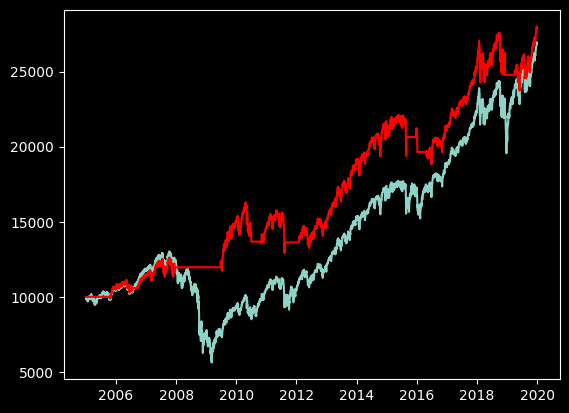

In [18]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.show()

In [19]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-20.51


In [20]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 171.94%
Benchmark CAGR: 6.9
Benchmark DD: -56.78%

System Total return: 179.24%
System CAGR: 7.09
System DD: -20.51%
System Time in the Market: 72.53%


In [21]:
def backtest(price, period_fast, period_slow):
    #calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window = period_fast).mean()
    price['Slow_MA'] = price.Close.rolling(window = period_slow).mean()

    #Hold a position for every day the close is above the MA
    price['Long'] = price.Fast_MA > price.Slow_MA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

In [22]:
periods_slow = []
periods_fast = []
periods_slow.extend(range(140, 255, 5))
periods_fast.extend(range(5, 105, 5))

cagr = {}

results_full = []

for slow in periods_slow:
    results_fast = []
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_fast.append(result)
    results_full.append(results_fast)

<Axes: >

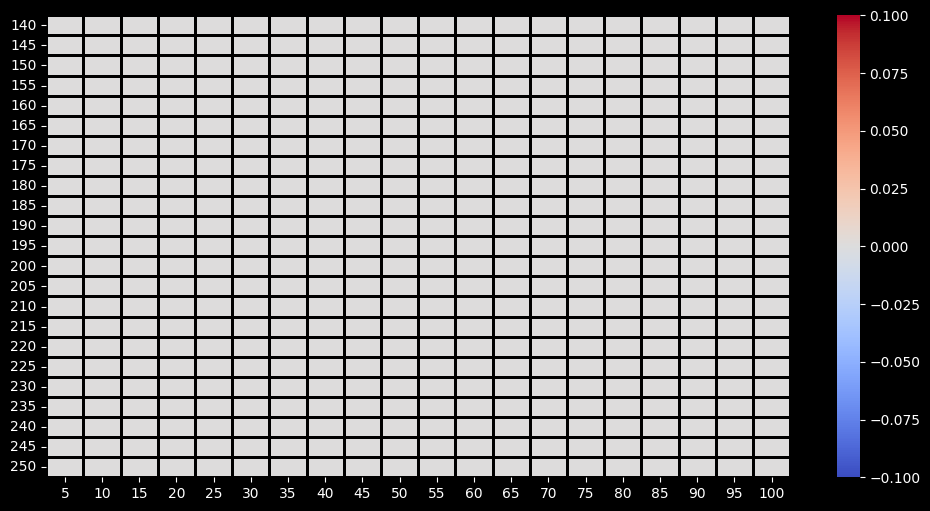

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            cmap="coolwarm",
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

In [24]:
max_cagr = max(list(map(max, results_full)))

max_cagr

np.float64(0.0)

In [25]:
for i, x in enumerate(results_full):
    if max_cagr in x:
        s = results_full[i].index(max_cagr)
        f = i

print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

Fast MA: 5
Slow MA: 250
CAGR: 0.0%


In [27]:
results_full.tail()

AttributeError: 'list' object has no attribute 'tail'

AUTHOR LICENSE 

https://github.com/russs123/moving_average/blob/main/LICENSE


MIT License

Copyright (c) 2024 russs123

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.